In [1]:
from lcs.agents.facs2 import fACS2, Configuration
from lcs.agents.facs2.adapters.WoodsFuzzyEnvironmentAdapter import WoodsFuzzyEnvironmentAdapter
from lcs.agents.facs2.adapters.Mazev2FuzzyEnvironmentAdapter import Mazev2FuzzyEnvironmentAdapter
from lcs.metrics import population_metrics
import gym
import gym_maze
import gym_woods
import logging

import pandas as pd
import numpy as np
from scipy.misc import face

def my_metrics(agent, env):
    pop = agent.population
    metrics = population_metrics(pop, env)
    return metrics

cfg_lin = Configuration(
    classifier_length=Mazev2FuzzyEnvironmentAdapter.condition_length,
    number_of_possible_actions=8,
    epsilon=0.9,
    user_metrics_collector_fcn=my_metrics,
    do_ga=True
    )

cfg_sig = Configuration(
    classifier_length=9,#Mazev2FuzzyEnvironmentAdapter.condition_length,
    number_of_possible_actions=8,
    epsilon=0.9,
    user_metrics_collector_fcn=my_metrics,
    aggregation_method='sum_to_three',
    fuzzy_function='sigmoid',
    do_ga=True
    )

environment_name = 'MazeF2-v0'
env = Mazev2FuzzyEnvironmentAdapter(gym.make(environment_name))

lin_agent = fACS2(cfg_lin)
sig_agent = fACS2(cfg_sig)

logging.basicConfig(level=logging.INFO)
trial = 150

import matplotlib.pyplot as plt
x=np.arange(0,150,1)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.25.8) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "



linear
sigmoid


### f. liniowa, agregacja 2-go stopnia 

In [2]:
lin_agent_explore = lin_agent.explore(env, trial)

INFO:lcs.agents.Agent:{'trial': 15, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 8.105575355999463, 'population': 2000, 'numerosity': 2000, 'reliable': 48}
INFO:lcs.agents.Agent:{'trial': 30, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.2867037180039915, 'population': 248, 'numerosity': 248, 'reliable': 0}
INFO:lcs.agents.Agent:{'trial': 45, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.32026690999919083, 'population': 234, 'numerosity': 234, 'reliable': 9}
INFO:lcs.agents.Agent:{'trial': 60, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.3986618280032417, 'population': 348, 'numerosity': 348, 'reliable': 12}
INFO:lcs.agents.Agent:{'trial': 75, 'steps_in_trial': 20, 'reward': 1000, 'perf_time': 0.15930821999791078, 'population': 467, 'numerosity': 467, 'reliable': 7}
INFO:lcs.agents.Agent:{'trial': 90, 'steps_in_trial': 4, 'reward': 1000, 'perf_time': 0.019655230003991164, 'population': 352, 'numerosity': 352, 'reliable': 5}
INFO:lcs.agents.Agent:{'trial': 105, 'steps_in

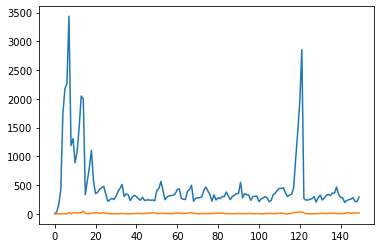

In [27]:
lin_pop = []
lin_rel = []

for i in range(trial):
    lin_pop.append(lin_agent_explore[i]['population'])
    lin_rel.append(lin_agent_explore[i]['reliable'])

lin_pop = np.array(lin_pop)
lin_rel = np.array(lin_rel)

plt.plot(x,lin_pop,lin_rel)
plt.show()

### f. sigmoid, agregacja-3go stopnia

In [3]:
sig_agent_explore = sig_agent.explore(env, trial)

INFO:lcs.agents.Agent:{'trial': 15, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.28741781000280753, 'population': 344, 'numerosity': 344, 'reliable': 10}
INFO:lcs.agents.Agent:{'trial': 30, 'steps_in_trial': 2, 'reward': 1000, 'perf_time': 0.005435979001049418, 'population': 201, 'numerosity': 201, 'reliable': 3}
INFO:lcs.agents.Agent:{'trial': 45, 'steps_in_trial': 47, 'reward': 1000, 'perf_time': 0.22562923900113674, 'population': 294, 'numerosity': 294, 'reliable': 4}
INFO:lcs.agents.Agent:{'trial': 60, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.24544391300150892, 'population': 192, 'numerosity': 192, 'reliable': 9}
INFO:lcs.agents.Agent:{'trial': 75, 'steps_in_trial': 2, 'reward': 1000, 'perf_time': 0.010947586997644976, 'population': 326, 'numerosity': 327, 'reliable': 14}
INFO:lcs.agents.Agent:{'trial': 90, 'steps_in_trial': 19, 'reward': 1000, 'perf_time': 0.09253922499920009, 'population': 262, 'numerosity': 262, 'reliable': 6}
INFO:lcs.agents.Agent:{'trial': 105, '

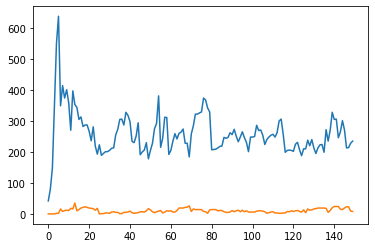

In [26]:
sig_pop = []
sig_rel = []
for i in range(trial):
    sig_pop.append(sig_agent_explore[i]['population'])
    sig_rel.append(sig_agent_explore[i]['reliable'])

sig_pop = np.array(sig_pop)
sig_rel = np.array(sig_rel)

plt.plot(x,sig_pop,sig_rel)
plt.show()